<a href="https://colab.research.google.com/github/hamednasr/deep-learning/blob/main/my_code_identically_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [463]:
# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


In [464]:
ANN_noseed = nn.Sequential(
        nn.Linear(2,8),
        nn.Linear(8,8),
        nn.Linear(8,1)
)

for layer in ANN_noseed.named_parameters():
  if 'weight' in layer[0]:
    nn.init.xavier_normal_(layer[1].data)

In [465]:
ANN_noseed[0].weight.data.flatten()

tensor([-0.0212, -0.8957, -0.2198,  0.7641,  0.3539,  0.4575,  0.4400,  0.4050,
        -0.2353, -0.4938, -0.3128,  0.2495, -0.4051, -0.1948, -0.2666, -0.4334])

In [466]:
wnoseed=np.array([])

for layer in range(len(ANN_noseed)):
  wnoseed = np.append(wnoseed,ANN_noseed[layer].weight.data.flatten())
wnoseed

array([-0.02120558, -0.89574689, -0.21976084,  0.76411134,  0.35386938,
        0.45750383,  0.4400214 ,  0.40495962, -0.23534426, -0.49383414,
       -0.31280264,  0.2495369 , -0.40512317, -0.19480672, -0.26660135,
       -0.43335408,  0.12267575, -0.23111063,  0.55105543,  0.1414472 ,
        0.86347687, -0.13500109,  0.15296595,  0.5833326 ,  0.14973098,
        0.20259386, -0.63506776, -0.10823843, -0.14858913,  0.09998726,
        0.12877762, -0.02822371, -0.34026009, -0.073387  , -0.49105313,
        0.00448695, -0.66236413,  0.63630515,  0.09983839,  0.07606066,
        0.09607451, -0.2859185 ,  0.04480321,  0.20176461, -0.04765604,
        0.12152212,  0.13145132,  0.13268007,  0.27477053, -0.82664764,
       -0.29313833,  0.41229242,  0.52278435,  0.09461397,  0.26732874,
       -0.44406804, -0.72899902,  0.15219535,  0.11937964, -0.12154647,
       -0.21822236,  0.44299152, -0.0181788 , -0.43707153,  0.18429291,
       -0.16018292, -0.04455373,  0.82578135, -0.2199121 , -0.04

In [467]:
ANN_rs1a = nn.Sequential(
        nn.Linear(2,8),
        nn.Linear(8,8),
        nn.Linear(8,1)
)
torch.manual_seed(1)
for layer in ANN_rs1a.named_parameters():
  if 'weight' in layer[0]:
    nn.init.xavier_normal_(layer[1].data)

In [468]:
ANN_rs1a[0].weight.data.flatten()

tensor([-0.6823, -0.3355, -0.2925, -0.7198, -0.0448, -0.2724, -0.4382, -0.7196,
        -0.3185,  0.1358, -0.3476, -0.1125, -0.0994,  0.7545,  0.1022,  0.2091])

In [469]:
ANN_rs2 = nn.Sequential(
        nn.Linear(2,8),
        nn.Linear(8,8),
        nn.Linear(8,1)
)
torch.manual_seed(2)
for layer in ANN_rs2.named_parameters():
  if 'weight' in layer[0]:
    nn.init.xavier_normal_(layer[1].data)

In [470]:
ANN_rs1b = nn.Sequential(
        nn.Linear(2,8),
        nn.Linear(8,8),
        nn.Linear(8,1)
)
torch.manual_seed(1)
for layer in ANN_rs1b.named_parameters():
  if 'weight' in layer[0]:
    nn.init.xavier_normal_(layer[1].data)

In [471]:
wnoseed,wrs1a,wrs2,wrs1b=np.array([]),np.array([]),np.array([]),np.array([])

for layer in range(len(ANN_noseed)):
  wnoseed = np.append(wnoseed,ANN_noseed[layer].weight.data.flatten())
  wrs1a = np.append(wrs1a,ANN_rs1a[layer].weight.data.flatten())
  wrs2 = np.append(wrs2,ANN_rs2[layer].weight.data.flatten())
  wrs1b = np.append(wrs1b,ANN_rs1b[layer].weight.data.flatten())


In [472]:
wnoseed

array([-0.02120558, -0.89574689, -0.21976084,  0.76411134,  0.35386938,
        0.45750383,  0.4400214 ,  0.40495962, -0.23534426, -0.49383414,
       -0.31280264,  0.2495369 , -0.40512317, -0.19480672, -0.26660135,
       -0.43335408,  0.12267575, -0.23111063,  0.55105543,  0.1414472 ,
        0.86347687, -0.13500109,  0.15296595,  0.5833326 ,  0.14973098,
        0.20259386, -0.63506776, -0.10823843, -0.14858913,  0.09998726,
        0.12877762, -0.02822371, -0.34026009, -0.073387  , -0.49105313,
        0.00448695, -0.66236413,  0.63630515,  0.09983839,  0.07606066,
        0.09607451, -0.2859185 ,  0.04480321,  0.20176461, -0.04765604,
        0.12152212,  0.13145132,  0.13268007,  0.27477053, -0.82664764,
       -0.29313833,  0.41229242,  0.52278435,  0.09461397,  0.26732874,
       -0.44406804, -0.72899902,  0.15219535,  0.11937964, -0.12154647,
       -0.21822236,  0.44299152, -0.0181788 , -0.43707153,  0.18429291,
       -0.16018292, -0.04455373,  0.82578135, -0.2199121 , -0.04

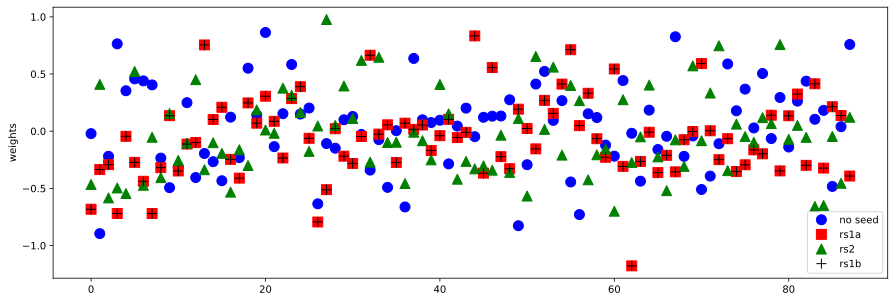

In [473]:
plt.figure(figsize=(15,5))
plt.plot(wnoseed,'bo',markersize=10,label='no seed')
plt.plot(wrs1a,'rs',markersize=10,label='rs1a')
plt.plot(wrs2,'g^',markersize=10,label='rs2')
plt.plot(wrs1b,'k+',markersize=10,label='rs1b')
plt.ylabel('weights')
plt.legend()
plt.show()
